In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
# 1. Last inn data
df = pd.read_csv("../data/data2.csv")
#df_t = pd.read_csv("../data/test_set.csv")
#df_f = pd.read_csv("../compeval/test_fasit.csv")

In [3]:
#df = pd.merge(df_t, df_f, on="id", how="inner")

In [4]:
df.columns

Index(['alder', 'lonn', 'utdanning', 'sko_str', 'avdeling', 'er_leder',
       'favorittfarge', 'ansiennitet', 'prestasjonsscore'],
      dtype='object')

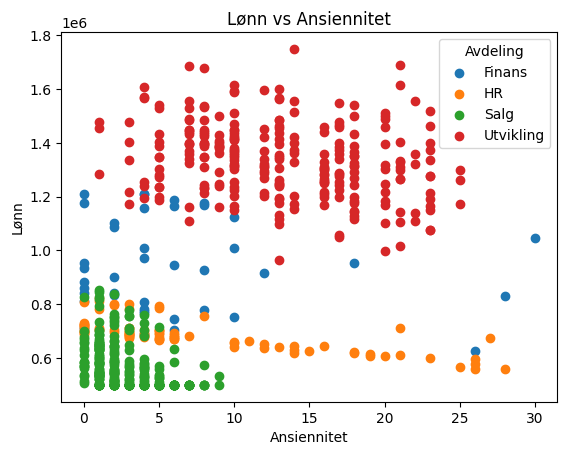

In [5]:
import matplotlib.pyplot as plt

# Assume your df is called "df"

fig, ax = plt.subplots()

for avd, group in df.groupby("avdeling"):
    ax.scatter(
        group["ansiennitet"],
        group["lonn"],
        label=avd
    )

ax.set_xlabel("Ansiennitet")
ax.set_ylabel("Lønn")
ax.set_title("Lønn vs Ansiennitet")
ax.legend(title="Avdeling")

plt.show()


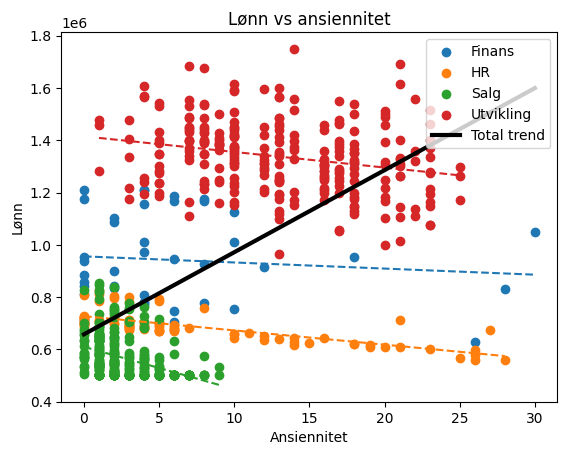

In [6]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# --- Scatter + trendline per department ---
for avd, group in df.groupby("avdeling"):
    ax.scatter(group["ansiennitet"], group["lonn"], label=avd)

    # Fit line: salary = a*x + b
    x = group["ansiennitet"].values
    y = group["lonn"].values
    a, b = np.polyfit(x, y, 1)

    # Trendline
    x_line = np.linspace(x.min(), x.max(), 100)
    y_line = a * x_line + b
    ax.plot(x_line, y_line, linestyle="--")

# --- Global (overall) trendline ---
x_all = df["ansiennitet"].values
y_all = df["lonn"].values
A, B = np.polyfit(x_all, y_all, 1)

x_line_all = np.linspace(x_all.min(), x_all.max(), 100)
y_line_all = A * x_line_all + B

ax.plot(
    x_line_all, y_line_all,
    linewidth=3, color="black", label="Total trend"
)

# --- Labels ---
ax.set_xlabel("Ansiennitet")
ax.set_ylabel("Lønn")
ax.set_title("Lønn vs ansiennitet")
ax.legend()

plt.show()
